In [ ]:
### First we have downloaded a net CDF from the Copernicus Data Store: https://cds.climate.copernicus.eu

### Required Changes:

- The complete table should be saved in the directory: `data/generated/index_table_output`
    - The file name must include the start and end dates for easier identification.

- For the functions `generate_etccdi_temporal_tables` and `generate_etccdi_temporal_tables__centroid`:
    - Suppress the printing of each graphic iteration during execution to reduce unnecessary output.

- Ensure that all generated graphics reference a single, consistent scale (legend).

- Issue with validation if:
    - partial years are set in the parameters option 
    - ex. monthly data is allowed but parameters request only part of given year.


# To-Do List

## dependencies file
- This is started as requirements.tx
    - Go through each function (.py) and pull out all dependencies 
    - compile into one simplified list
    - consult viewser and check which are absent
    - make list of just the absent to install before running

## Decision Tree Development
- Create a **decision tree for defensible methods** based on different applications:
    - If performing at an admin or country scale, use method X.
    - Address the question: "At what scale does the utility of finer-grained PRIOgrid data diminish?" 
    - Incorporate considerations of 'other' shapefile extents.

## API Considerations
- Investigate potential **API changes**:
    1. Ensure the `define_request.py` script is correctly referenced.
    2. Contact CDS to determine their API update schedule (e.g., every 6 months or yearly).
    3. Check the **CDS API forum** for transparency on updates.

## Feature Enhancements
- Add **descriptive statistics**:
    - Include basic summary stats for the requested indices.
- Allow users to view country-specific data:
    - Avoid packaging into larger datasets.
  
## Additional Notes
- Add a **section in the documentation** clarifying how to migrate workflows toward ingestion smoothly.


In [1]:
import pandas as pd
import xarray as xr
import numpy as np

In [2]:
from ingester3.extensions import *

# 5.4 Scaffolders



In [3]:
#5.4 Scaffolders

new_pg = pd.DataFrame.pg.new_structure()

pg_max = new_pg['pg_id'].max()
pg_min = new_pg['pg_id'].min()

print(pg_max)
print(pg_min)

sorted_df = new_pg.sort_values(by="pg_id", ascending=False)
sorted_df

Instantiating priogrid, please wait...
Fetching rows : 0 - 50000
Fetching rows : 50000 - 100000
249344
49182


,pg_id
64817,249344
64816,249343
64815,249342
64814,249341
64813,249340
...,...
4,49186
3,49185
2,49184
1,49183


In [4]:
new_pg['lat'] = new_pg.pg.lat
new_pg['long'] = new_pg.pg.lon

In [5]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon
import os 

home_path = os.getcwd()


# Define the function to create a 0.5x0.5 degree grid cell around a center point
def create_grid_cell(lat, lon, cell_size=0.5):
    half_size = cell_size / 2
    # Define the corners of the grid cell
    return Polygon([
        (lon - half_size, lat - half_size),  # Bottom-left
        (lon + half_size, lat - half_size),  # Bottom-right
        (lon + half_size, lat + half_size),  # Top-right
        (lon - half_size, lat + half_size),  # Top-left
        (lon - half_size, lat - half_size)   # Close the polygon
    ])

# Create a GeoDataFrame with grid cells
geometry = new_pg.apply(lambda row: create_grid_cell(row['lat'], row['long']), axis=1)
gdf = gpd.GeoDataFrame(new_pg, geometry=geometry, crs="EPSG:4326")

# Save or visualize the grid

gdf.to_file(f"{home_path}/data/processed/extent_shapefile/pg_viewser_extent.shp")  # Save as a shapefile if needed
print(gdf)


        pg_id    lat   long                                           geometry
0       49182 -55.75 -69.25  POLYGON ((-69.50000 -56.00000, -69.00000 -56.0...
1       49183 -55.75 -68.75  POLYGON ((-69.00000 -56.00000, -68.50000 -56.0...
2       49184 -55.75 -68.25  POLYGON ((-68.50000 -56.00000, -68.00000 -56.0...
3       49185 -55.75 -67.75  POLYGON ((-68.00000 -56.00000, -67.50000 -56.0...
4       49186 -55.75 -67.25  POLYGON ((-67.50000 -56.00000, -67.00000 -56.0...
...       ...    ...    ...                                                ...
64813  249340  83.25 -70.25  POLYGON ((-70.50000 83.00000, -70.00000 83.000...
64814  249341  83.25 -69.75  POLYGON ((-70.00000 83.00000, -69.50000 83.000...
64815  249342  83.25 -69.25  POLYGON ((-69.50000 83.00000, -69.00000 83.000...
64816  249343  83.25 -68.75  POLYGON ((-69.00000 83.00000, -68.50000 83.000...
64817  249344  83.25 -68.25  POLYGON ((-68.50000 83.00000, -68.00000 83.000...

[64818 rows x 4 columns]


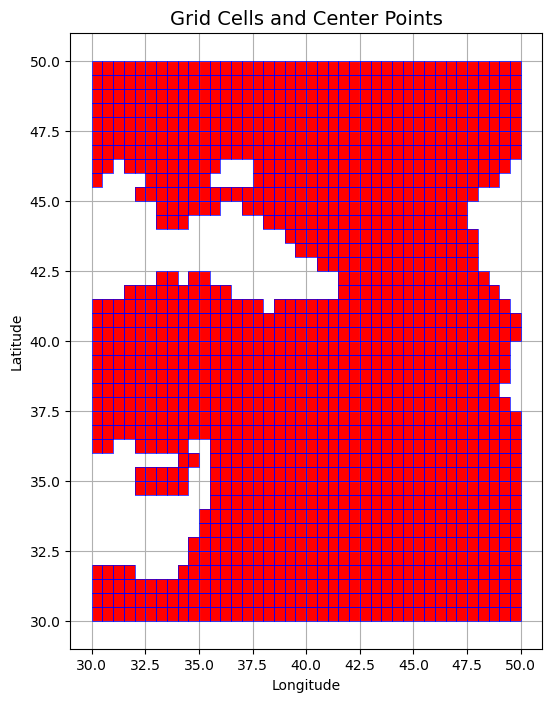

In [9]:
import matplotlib.pyplot as plt
filtered_gdf = gdf[
    (gdf['lat'] >= 30) & (gdf['lat'] <= 50) &
    (gdf['long'] >= 30) & (gdf['long'] <= 50)
]

fig, ax = plt.subplots(figsize=(8, 8))

# Plot the polygons (grid cells)
filtered_gdf.boundary.plot(ax=ax, color="blue", linewidth=0.5)

# Plot the center points
filtered_gdf.plot(ax=ax, color="red", markersize=5)

# Customize the plot
ax.set_title("Grid Cells and Center Points", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)

# Show the plot
plt.show()

In [ ]:
new_pgy = new_pgy.rename(columns={'year_id':'year'})

In [ ]:
new_pgy

In [ ]:
new_pgm['month'] = new_pgm.m.month
new_pgm['year'] = new_pgm.m.year

new_pgm

In [ ]:
from setup_environment import setup_utils_path
setup_utils_path()

In [ ]:

# Format API Request ----------------------------------------------------------------
from unzip import unzip_etccdi_package
from correct_longitude import transform_longitudinal_values
from temporal_index import find_etccdi_timeindex, translate_index_to_daterange
from define_request import generate_and_validate_request

# Provide Metadata ------------------------------------------------------------------
from give_metadata import give_metadata

# Build API Request -----------------------------------------------------------------
from cds_api_pull import pull_from_cds_api

# Methods ---------------------------------------------------------------------------
from etccdi_to_pg__pointquery import generate_etccdi_temporal_tables__centroid
from etccdi_to_pg import generate_etccdi_temporal_tables

# Validation ------------------------------------------------------------------------
from give_reference_frame import provide_reference_frame
from id_null_values import report_null_etccdi_values

## Access with Copernicus Data Store API:

### You must have both a Copernicus Data Store account and have followed the proceeding instructions on setting up the CDSAPI before you can retrieve and process data from this toolbox. 

#### The following instructions reference the CDSAPI set up guide: https://cds.climate.copernicus.eu/how-to-api


The final objective is to construct a main.py function that accepts the parameters below and automatically computes the process!

## API Request and Processing Parameters

### API Request Parameters
These parameters define the data retrieved via the API request:
- **`variable`**: Specifies the data variable of interest.
- **`product_type`**: Indicates the base product type.
- **`experiment`**: Defines the experimental setup or scenario.
- **`temporal_aggregation`**: Determines the temporal resolution of the data.

### Processing Parameters
These parameters guide the processing workflow:
- **`start_year`**: `'1995'`
- **`start_month`**: `'01'`
- **`end_year`**: `'2000'`
- **`end_month`**: `'12'`

### Method Selection
Choose a resampling or data alignment method:
- **Bilinear sampling**: Applies weighted interpolation for smoother results.
- **Point neighbor**: Maps the closest neighboring value preserving the original coarse resolution.

### (In Development) Extent Selection
Additional options for spatial analysis:
- Empirical distributions based on basin-specific extents.
- Future iterations will enable a 'hotspot' methodology for comparison with global metrics.


## Example of CDS Request

```
import cdsapi

dataset = "sis-extreme-indices-cmip6"
request = {
    "variable": ["cold_days"], 
    "product_type": ["base_period_1961_1990"],
    "model": ["hadgem3_gc31_ll"],
    "ensemble_member": ["r1i1p1f3"],
    "experiment": ["ssp1_2_6"],
    "temporal_aggregation": ["monthly"],
    "period": ["201501_210012"],
    "version": ["2_0"]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()
```   
``` 
dataset = "sis-extreme-indices-cmip6"
request = {
    "variable": ["consecutive_dry_days"],
    "product_type": ["base_independent"],
    "model": ["hadgem3_gc31_ll"],
    "ensemble_member": ["r1i1p1f3"],
    "experiment": ["ssp1_2_6"],
    "temporal_aggregation": ["yearly"],
    "period": ["2015_2100"],
    "version": ["2_0"]
}
```


## Informing parameters

This series of prompts will help constrain appropriate parameters to construct a request that matches the CDS API

First, select a temporal aggregation (yearly / monthly)

- if yearly:
supply a response that reads: (all variables are available at yearly temporal resolution. Here a list of all available climate indices.)

- if monthly:
supply a response that reads: (Select indices are available at a monthly temporal resolution. Select from the following:)


supply the climate index from the list of available variables. Please provide the name exactly as it is written in the list.

- add code check (Is the variable located within the list?) 
    - if not, supply prompt to check spelling

Next, select the climate 'experiment' used to process the derived climate indices. You may select from 'historical, ssp2.. sspx... and sspz

- if historical AND monthly
    - align appropriate 'period' variable
    - etcd (applied to sspx_x and so on)



In [ ]:
import pandas as pd

# Data for the DataFrame
data = {
    "product_type": [
        "base_independent", "base_independent", "base_independent", "base_independent",
        "base_independent", "base_independent", "base_independent", "base_independent",
        "base_independent", "base_independent", "base_independent", "base_independent",
        "base_independent", "base_independent", "base_independent", "base_independent",
        "base_independent", "base_independent", "base_independent", "base_period_1961_1990",
        "base_period_1961_1990", "base_period_1961_1990", "base_period_1961_1990"
    ],
    "variable": [
        "consecutive_dry_days", "consecutive_wet_days", "diurnal_temperature_range", "frost_days",
        "growing_season_length", "heavy_precipitation_days", "ice_days", "maximum_1_day_precipitation",
        "maximum_5_day_precipitation", "maximum_value_of_daily_maximum_temperature",
        "minimum_value_of_daily_maximum_temperature", "maximum_value_of_daily_minimum_temperature",
        "minimum_value_of_daily_minimum_temperature", "number_of_wet_days", "simple_daily_intensity_index",
        "summer_days", "total_wet_day_precipitation", "tropical_nights", "very_heavy_precipitation_days",
        "cold_days", "cold_nights", "warm_days", "warm_nights"
    ],
    "temporal_aggregation": [
        "annual", "annual", "monthly or annual", "annual", "annual", "annual", "annual", "monthly or annual",
        "monthly or annual", "monthly or annual", "monthly or annual", "monthly or annual", "monthly or annual",
        "annual", "annual", "annual", "annual", "annual", "annual", "monthly or annual", "monthly or annual",
        "monthly or annual", "monthly or annual"
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

#first, 


In [ ]:
print('First, select a temporal aggregation (yearly \ monthly)')

time = 'monthly'

if time == 'monthly':
    variable_list = df.loc[df['temporal_aggregation'].str.contains('monthly or annual'), 'variable'].tolist()

    print('Select indices are available at a monthly temporal resolution. Select from the following:')
    print()
    print(variable_list)

if time == 'yearly':
    
    variable_list = df['variable'].tolist()
    print('all variables are available at yearly temporal resolution. Here a list of all available climate indices.')
    print()
    print(variable_list)

variable = 'maximum_1_day_precipitation'

#define the product type:

product_type = df.loc[df['variable'] == variable, 'product_type'].values[0]

if variable in variable_list:
    print(f"'{variable}' is a valid selection.")
else:
    raise ValueError(f"'{variable}' does not in the list. Please check your spelling!")

print('Finally, select the climate experiment used to process the derived climate indices. You may select from historical, ssp2.. sspx... and sspz')

user_scenario = 'historical'

if user_scenario == "historical" and time == "monthly":
    result = "185001_201412"
elif user_scenario == "historical" and time == "yearly":
    result = "1850_2014"
elif user_scenario in ["ssp1_2_6", "ssp2_4_5", "ssp5_8_5"] and time == "monthly":
    result = "201501_210012"
elif user_scenario in ["ssp1_2_6", "ssp2_4_5", "ssp5_8_5"] and time == "yearly":
    result = "2015_2100"
else:
    raise ValueError(f"Invalid combination of scenario '{user_scenario}' and time '{time}'.")


# Split the string by the underscore
split_string = result.split('_') 

# Extract the first four characters of each element and convert them to integers
min_value = int(split_string[0][:4])  # First four characters, converted to integer
max_value = int(split_string[1][:4])  # First four characters, converted to integer

# Define the user input (this is an example; replace with actual user input)
user_input = "1900"  # This should be a string input, like from an input prompt

# Convert the user input to an integer
input_value = int(user_input)

# Check if the input is within the range
if min_value <= input_value <= max_value:
    print(f"The input value {input_value} is within the range {min_value}-{max_value}.")
else:
    print(f"The input value {input_value} is out of the permitted range {min_value}-{max_value}.")

print(f'acceptable years for the selected Climate Scenario ({user_scenario}) are {min_value}-{max_value}')
#Check if temporal inputs are valid! 
#    appropriate range is defined by 'result'

#is the start year within appropriate range?

#is the end year within appropriate range?

# Start a loop to repeatedly ask for input until a valid value is entered
while True:
    # Define the user input (this will be from an input prompt)
    user_input = input(f"Please enter a value between {min_value} and {max_value}: ")
    
    try:
        # Convert the user input to an integer
        input_value = int(user_input)

        # Check if the input is within the range
        if min_value <= input_value <= max_value:
            print(f"The input value {input_value} is within the range {min_value}-{max_value}.")
            break  # Exit the loop if the input is valid
        else:
            print(f"The input value {input_value} is out of the permitted range {min_value}-{max_value}. Please try again.")

    except ValueError:
        print("Invalid input. Please enter a valid number.")



### Product Type and Variable Temporal Aggregation

| product_type            | variable                           | temporal_aggregation |
|-------------------------|------------------------------------|----------------------|
| base_independent         | consecutive_dry_days               | annual               |
| base_independent         | consecutive_wet_days               | annual               |
| base_independent         | diurnal_temperature_range          | monthly or annual    |
| base_independent         | frost_days                         | annual               |
| base_independent         | growing_season_length              | annual               |
| base_independent         | heavy_precipitation_days           | annual               |
| base_independent         | ice_days                           | annual               |
| base_independent         | maximum_1_day_precipitation        | monthly or annual    |
| base_independent         | maximum_5_day_precipitation        | monthly or annual    |
| base_independent         | maximum_value_of_daily_maximum_temperature | monthly or annual    |
| base_independent         | minimum_value_of_daily_maximum_temperature | monthly or annual    |
| base_independent         | maximum_value_of_daily_minimum_temperature | monthly or annual    |
| base_independent         | minimum_value_of_daily_minimum_temperature | monthly or annual    |
| base_independent         | number_of_wet_days                 | annual               |
| base_independent         | simple_daily_intensity_index       | annual               |
| base_independent         | summer_days                        | annual               |
| base_independent         | total_wet_day_precipitation        | annual               |
| base_independent         | tropical_nights                    | annual               |
| base_independent         | very_heavy_precipitation_days      | annual               |
| base_period_1961_1990    | cold_days                          | monthly or annual    |
| base_period_1961_1990    | cold_nights                        | monthly or annual    |
| base_period_1961_1990    | warm_days                          | monthly or annual    |
| base_period_1961_1990    | warm_nights                        | monthly or annual    |

The table above defines the `product_type`, `variable`, and the corresponding `temporal_aggregation` classification options for required parameters. Variables that are only available on a yearly basis are labeled as "annual," while others that can be reported on both monthly and annual bases are labeled as "monthly or annual."

### Experiment Period Mapping

| experiment  | period        |
|-------------|---------------|
| historical | 185001_201412 |
| ssp1_2_6   | 201501_210012 |
| ssp2_4_5   | 201501_210012 |
| ssp5_8_5   | 201501_210012 |


In [ ]:
# Read configuration from the .txt file
import os
base_dir= os.getcwd()
config_file_path = f'{base_dir}/request.txt'  # Adjust this path to where your .txt file is located

config = {}
with open(config_file_path, 'r') as file:
    for line in file:
        key, value = line.strip().split(':')
        config[key.strip()] = value.strip()

# Assign variables from the config dictionary
p_variable = config.get('p_variable')
p_product_type = config.get('p_product_type')
p_experiment = config.get('p_experiment')
p_temporal_aggregation = config.get('p_temporal_aggregation')

In [ ]:
print(p_variable)

In [ ]:
p_variable = "ice_days"
p_product_type="base_independent"
p_experiment="ssp1_2_6"
p_temporal_aggregation="yearly"

#-----------------------------------------------------------
# Define Start Year & Month
#-----------------------------------------------------------
start_year = '2015'
start_month = '01'
#-----------------------------------------------------------
# Define End Year & Month
end_year = '2016'
end_month = '04'
#-----------------------------------------------------------
method = 'raster_query' # or raster_query
#-----------------------------------------------------------
save_tif = 'no' # or no
#-----------------------------------------------------------

#country_selection = None

In [ ]:
# Now, calling the function will generate and validate the request

request = generate_and_validate_request(
    variable=p_variable,
    product_type=p_product_type,
    experiment=p_experiment,
    temporal_aggregation=p_temporal_aggregation
)
temporal_aggregation_value = request['temporal_aggregation'][0]
print(temporal_aggregation_value)
display(request)

#-------------------------------------------------------------------
# Load a clean PG dataframe at a consistent temporal resolution
# to the request built
#-------------------------------------------------------------------

#reference_df = provide_reference_frame(request)

The zip_file_name will appear in folder:

```
CLIMATE_EXTREMES/
├── data/
│   ├── raw_external/
│   │   └── cds_zip/
```

In [ ]:
zip_file_name = pull_from_cds_api(request)

The netcdf file will appear in folder: 

```
CLIMATE_EXTREMES/
├── data/
│   ├── generated/
│   │   └── netcd/

```

In [ ]:
netcdf_file, etccdi_index = unzip_etccdi_package(zip_file_name)

The adjusted netcdf file replaced the original file in location:

```
CLIMATE_EXTREMES/
├── data/
│   ├── generated/
│   │   └── netcd/
```

In [ ]:
etccdi = transform_longitudinal_values(etccdi_index, netcdf_file)

In [ ]:
give_metadata(etccdi)

In [ ]:
index_list, reference_filtered_time, report_temporal_dimensions = translate_index_to_daterange(etccdi, reference_df, temporal_aggregation_value, start_year, start_month, end_year, end_month)

### Params:

- time_index_list,
- netcdf, climate_index, 
- shapefile_path



Raster files:
```
CLIMATE_EXTREMES/
├── data/
│   ├── generated/
│   │   └── index_raster_output/
```

Final output table:
```
CLIMATE_EXTREMES/
├── data/
│   ├── generated/
│   │   └── index_table_output/
```


### Changes:

#### Do not print each iteration of the graphics!
- Complete for raster_query
- Finish for resample!

In [ ]:
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
from rasterio.enums import Resampling
import xarray as xr
import geopandas as gpd
from rasterstats import zonal_stats
import pandas as pd
import os

import math  # Add this import at the top of your file
import geopandas as gpd


from pathlib import Path
from matplotlib.backends.backend_pdf import PdfPages  # Import PdfPages for saving PDF layouts
import tempfile

from rasterio.io import MemoryFile

def generate_layout_and_save(param_time_index_list, plot_figures, output_folder, param_climate_index):
    columns = 4
    rows = 3
    plots_per_page = columns * rows
    total_plots = len(plot_figures)
    total_pages = math.ceil(total_plots / plots_per_page)

    output_folder = Path(output_folder)
    output_folder.mkdir(parents=True, exist_ok=True)
    output_file = output_folder / f'{param_climate_index}_layout__resample.pdf'

    with PdfPages(output_file) as pdf:
        for page in range(total_pages):
            fig, axes = plt.subplots(rows, columns, figsize=(11.69, 8.27))  # A4 size in landscape
            axes = axes.flatten()

            for i in range(plots_per_page):
                plot_index = page * plots_per_page + i
                if plot_index < total_plots:
                    fig_plot = plot_figures[plot_index]
                    
                    # Remove x and y labels, but keep the axes and legend
                    for ax in fig_plot.get_axes():
                        ax.set_xlabel('')  # Remove x-axis label
                        ax.set_ylabel('')  # Remove y-axis label

                    # Save each figure to a temporary file, then load it
                    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmpfile:
                        fig_plot.savefig(tmpfile.name, bbox_inches='tight')  # Save plot with legend
                        img = plt.imread(tmpfile.name)
                        axes[i].imshow(img)  # Place the image into the subplot axis
                        axes[i].axis('off')  # Turn off axis for a cleaner layout
                else:
                    axes[i].axis('off')  # Hide unused subplots

            plt.tight_layout()
            pdf.savefig(fig)
            plt.close(fig)

    print(f"All graphics saved to {output_file}")
    return output_file

def generate_etccdi_temporal_tables(param_time_index_list, param_netcdf, param_climate_index, temporal_params, save_raster, param_shapefile_name='pgm_viewser_extent.shp'):
    project_root = Path.cwd()  # Set this to your project root manually if needed

    map_folder = project_root / 'docs' / 'Graphics' / 'Standard_review'

    extent_path = project_root / 'data' / 'processed' / 'extent_shapefile'
    extent_filename = extent_path / param_shapefile_name


    out_originalraster_folder = project_root / 'data' / 'generated' / 'index_raster_output' /'native' 
    out_upsampleraster_folder = project_root / 'data' / 'generated' / 'index_raster_output' / 'method' / 'upsampled'

    generated_index_table_folder = project_root / 'data' / 'generated' / 'index_table_output'

    temporal_attribution = '_'.join(temporal_params)

    all_stats = []
    plot_figures = []  # Initialize list to store figures

    # Ensure the output folder exists
    #os.makedirs(output_folder, exist_ok=True)

    # Retrieve the first and last time indices for file naming
    first_time_index = param_time_index_list[0]
    last_time_index = param_time_index_list[-1]

    for i in param_time_index_list:
        print(f"Processing time index: {i}")
        
        # Select the data for the specified climate index
        data = param_netcdf[param_climate_index]
        
        # Check the data type and process accordingly
        data_type = data.dtype
        if data_type == 'timedelta64[ns]':
            data_days = data / np.timedelta64(1, 'D')  # Convert to days if it's timedelta
            raster_data = data_days.isel(time=i)
        elif data_type == 'float32':
            raster_data = data.isel(time=i)  # Use as-is if it's already float32
        else:
            raise TypeError(f"Unsupported data type '{data_type}' for variable '{param_climate_index}'. Expected 'timedelta64[ns]' or 'float32'.")
        
        # Convert spatial dimensions
        raster_data = raster_data.rename({'lon': 'x', 'lat': 'y'})
        raster_data = raster_data.rio.set_spatial_dims(x_dim='x', y_dim='y')

        # Get the date and time information
        date_time = str(param_netcdf['time'].isel(time=i).values.item())
        year, month = date_time.split('-')[:2]
        print("Year:", year, "Month:", month)

        # Set CRS if not already defined
        if not raster_data.rio.crs:
            print("CRS is not set. Setting CRS to EPSG:4326")
            raster_data = raster_data.rio.write_crs("EPSG:4326")

        # Save the original raster to the designated folder
        # --- original_raster_path = os.path.join(out_originalraster_folder, f"original_{param_climate_index}_{year}_{month}.tif")
        # ---- raster_data.rio.to_raster(original_raster_path)
        # ---- print(f"Original raster saved at: {original_raster_path}")

        # Create a separate raster with null values set to -9999
        # --- raster_with_nulls_set = raster_data.fillna(-9999)

        # Save the modified raster (with nulls as -9999) to the designated folder
        # --- null_set_raster_path = os.path.join(out_originalraster_folder, f"null_set_{param_climate_index}_{year}_{month}.tif")
        # --- raster_with_nulls_set.rio.to_raster(null_set_raster_path)
        # --- print(f"Raster with nulls set to -9999 saved at: {null_set_raster_path}")

        # Resample directly with bilinear interpolation
        def resample_with_bilinear(raster_data, factor=3):
            # Resample with the target shape
            upsampled_raster = raster_data.rio.reproject(
                raster_data.rio.crs,
                shape=(
                    int(raster_data.sizes['y'] * factor),
                    int(raster_data.sizes['x'] * factor)
                ),
                resampling=Resampling.bilinear
            )
            return upsampled_raster

        # Apply the resampling method
        upsampled_raster = resample_with_bilinear(raster_data, factor=20)

        # Plot the resampled raster
        plt.figure(figsize=(10, 6))
        upsampled_raster.plot(cmap='viridis')
        plt.title(f'Upsampled Raster for {param_climate_index} at Time Index {i}')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        #plt.show()

        if save_raster == 'yes':
            upsampled_raster_path = os.path.join(out_upsampleraster_folder, f"upsampled_{param_climate_index}_{year}_{month}.tif")
            upsampled_raster.rio.to_raster(upsampled_raster_path)
            print(f"Upsampled raster saved at: {upsampled_raster_path}")
        else:
        # Save the resampled raster to the designated folder
            with MemoryFile() as memfile:
                with memfile.open(driver='GTiff', 
                                width=upsampled_raster.rio.width, 
                                height=upsampled_raster.rio.height, 
                                count=1, 
                                dtype=upsampled_raster.dtype, 
                                crs=upsampled_raster.rio.crs, 
                                transform=upsampled_raster.rio.transform()) as dataset:
                    dataset.write(upsampled_raster.values, 1)

                # Load the shapefile for zonal statistics
                gdf = gpd.read_file(extent_filename)
                gdf = gdf[['gid', 'geometry', 'xcoord', 'ycoord']]

                # Calculate zonal statistics on the upsampled raster
                stats = zonal_stats(gdf, memfile, stats='mean', geojson_out=True)
                stats_gdf = gpd.GeoDataFrame.from_features(stats)

                # Add year and month fields
                stats_gdf['year'] = year
                stats_gdf['month'] = month
                stats_gdf.rename(columns={'mean': param_climate_index}, inplace=True)

                # Ensure stats_gdf has valid geometry and data
                stats_gdf = stats_gdf[stats_gdf.geometry.notnull() & stats_gdf[param_climate_index].notnull()]
            del upsampled_raster  # Clean up if no longer needed

        # Plot the zonal statistics if there is data
        if not stats_gdf.empty:
            fig, ax = plt.subplots(figsize=(10, 6))
            stats_gdf.plot(column=param_climate_index, ax=ax, legend=True, cmap='viridis', edgecolor='none')
            ax.set_title(f'{param_climate_index} Statistics by Region - {year}-{month}')
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')
            #plt.show()
            plot_figures.append(fig)  # Append figure to list
            plt.close(fig)

        else:
            print(f"No valid zonal statistics data to plot for {param_climate_index} at time index {i}")

        # Append to list
        all_stats.append(stats_gdf)

    # Concatenate all DataFrames
    final_gdf = pd.concat(all_stats, ignore_index=True)

    # Save final DataFrame to CSV in the designated folder

    file_name = f"{param_climate_index}_{temporal_attribution}__centroid_process.csv"
    output_file_path = generated_index_table_folder / file_name


    final_gdf.to_csv(output_file_path, index=False)
    print(f"Final DataFrame saved to: {output_file_path}")

    generate_layout_and_save(param_time_index_list, plot_figures, map_folder, param_climate_index)

    return output_file_path

In [ ]:
if method == 'raster_query':
    translated_filename = generate_etccdi_temporal_tables__centroid(index_list, etccdi, etccdi_index, report_temporal_dimensions, save_tif)

elif method == 'resample':
    translated_filename = generate_etccdi_temporal_tables(index_list, etccdi, etccdi_index, report_temporal_dimensions, save_tif)

else: 
    print('you have entered a bad prompt for the method parameter. Please restart.... ')

``translated_filename`` retrieves the summary table saved to:


``reference_filtered_time`` retrieves the primary reference table saved to:

## There was an error in report_null_etccdi_values:
proceeding code line concentrates on this

In [ ]:
index = str(translated_filename).split('_')[0]
print(index)

In [ ]:
report_null_etccdi_values(translated_filename, reference_filtered_time, temporal_aggregation_value)

## Now you can migrate to the ingestion script

We want to intentionally keep these things seperate (lock / key) so unwanted things are not automatically ingested

- **Clarify migration to the ingestion script**:

In [ ]:
print( "Now you are ready to run the ingestion code located in .... ")

In [ ]:
import geopandas as gpd

In [ ]:
import sqlalchemy as sa
from ingester3.config import source_db_path

engine = sa.create_engine(source_db_path)
gdf_pid = gpd.GeoDataFrame.from_postgis(
    "SELECT id as priogrid_gid, in_africa, in_me, geom FROM prod.priogrid", 
    engine, 
    geom_col='geom'
)
gdf_pid = gdf_pid.to_crs(4326)